# YOLO Demo

This is a demonstration of YOLO object detection technique using Tensorflow. This demonstration will utilise Darkflow, which is a Tensorflow implementation of Darknet (the YOLO implemetation, written in C++ https://github.com/pjreddie/darknet)

Pre-requisites:
- Python
- Anaconda
- Tensorflow
- OpenCV
- Darkflow

#### Resources
Install Anaconda: https://www.youtube.com/watch?v=T8wK5loXkXg

Install Tensorflow: https://www.youtube.com/watch?v=RplXYjxgZbw

windows Binaries site: https://www.youtube.com/redirect?redir_token=kRuTrkZGttWS37cbYFtoBL9v3XZ8MTUzNzUxNDU2OUAxNTM3NDI4MTY5&event=video_description&v=PyjBd7IDYZs&q=https%3A%2F%2Fwww.lfd.uci.edu%2F%7Egohlke%2Fpythonlibs%2F

Darkflow Repo: https://github.com/thtrieu/darkflow

YOLO weights: https://pjreddie.com/darknet/yolo/

In [1]:
#Import the necessary libraries
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt

C:\Users\John Kennedy\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# Format the resulting graph as SVG
%config InlineBackend.figure_format = 'svg'

# Load the model, weights, set the gpu usage and threshold for object
options = {
    'model': 'cfg\yolo.cfg',
    'load': 'bin\yolov2.weights',
    'gpu': 0.8,
    'threshold': 0.3
}

# Initialise and load the TensorFlow graph
tfnet = TFNet(options);

C:\Users\John Kennedy\Documents\DSC\TF\darkflow\darkflow\darkflow\dark\darknet.py:54: UserWarning: ./cfg/yolov2.cfg not found, use cfg\yolo.cfg instead
  cfg_path, FLAGS.model))


Parsing cfg\yolo.cfg
Loading bin\yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.01562356948852539s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bn

In [ ]:
img = cv2.imread('sample_img\sample_dog.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB);

In [ ]:
# Hmmmnn...what do we have here
result = tfnet.return_predict(img)
# *Drum roll* Print the objects identified in the image as a JSON object
print(result)

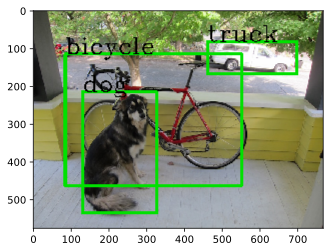

In [33]:
#Loop through each of the objects identified and draw a bounding box around them
for item in result:
    tl = (item['topleft']['x'], item['topleft']['y'])
    br = (item['bottomright']['x'], item['bottomright']['y'])
    label = item['label']

    img = cv2.rectangle(img, tl, br, (0, 225, 0), 7)
    img = cv2.putText(img, label, tl, cv2.FONT_HERSHEY_COMPLEX, 2, (0,0,0), 2)

In [ ]:
# Show the input image and the bounding boxes, with their associated label on a graph
plt.imshow(img)
plt.show()